# Graph Visualizer For Algorithms using CSV File

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch
from matplotlib.lines import Line2D

In [50]:
plt.rcParams.update({'font.size': 16})

MDRRHA_SJS_FCFS = 0
ALGO_COMPARISONS_ATAT_BAR = 1
ALGO_COMPARISONS_ATAT_LINE = 2
ALGO_COMPARISONS_WT_BAR = 3
ALGO_COMPARISONS_WT_LINE = 4

output_filename = "./../data/dataset_filtered_output.csv"

In [84]:
# Import Data from CSV file
dataset = pd.read_csv(
    './../data/dataset_filtered_output.csv', 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)


dataset = dataset.loc[dataset['name'].isin(['NDRRHA', 'HRRNHA'])]
dataset = dataset.loc[dataset['#cases'] >= 300]
# print(dataset)


<Figure size 432x288 with 0 Axes>

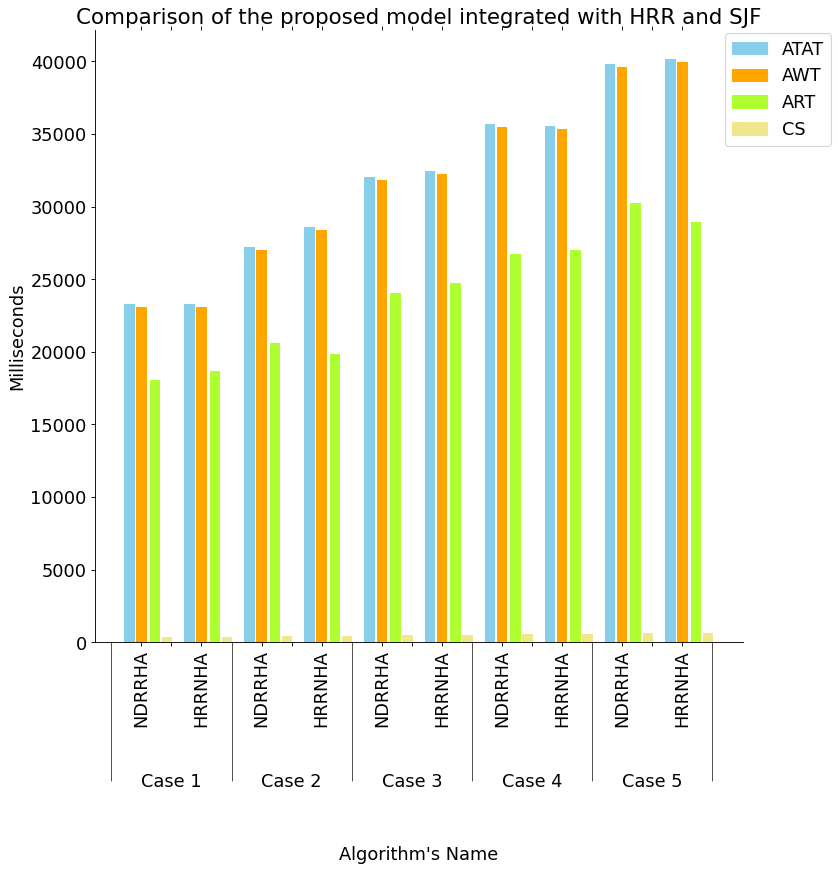

In [85]:
# Comparison of mDRRHA with SJF and FCFS

# Graph Configurations 
plt.figure(MDRRHA_SJS_FCFS)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['name'].to_numpy()
X_labels = []
X_axis = []
X_axis_lines = [0]
X_axis_bars = []

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    X_axis_bars.append(counter)

    counter += 1
    if push_empty:
        push_empty = False
        X_axis_lines.append(counter)
        counter += 1

    if i % 2 == 0:
        X_labels = np.append(X_labels, 'Case ' + str(current_case_index))
        current_case_index += 1
        X_axis.append(counter)
        counter += 1
        push_empty = True

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# vertical alignment of xtick labels
minor_axis_padding_up = -0.2
vertical_align = []
for i in range(0, len(X_labels)):
    valueToPush = 0
    if i % 3 == 1:
        valueToPush = minor_axis_padding_up      

    vertical_align.append(valueToPush)

# Adding Lines to xTicks
line_width = 0.025
line_height = 125

for i, (t, y) in enumerate(zip(ax.get_xticklabels(), vertical_align)):
    if i % 3 == 0 or i % 3 == 2:
        t.set_rotation(90)

    t.set_y(y)


ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

bar_width = 0.35
padding_betweenbars = 0.05

avgTAT_color = 'skyblue'
avgWT_color = 'orange'
avgRT_color = 'greenyellow'
nCS_color = 'khaki'

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

avgTAT_values = dataset['avgTAT'].to_numpy()
avgWT_values = dataset['avgWT'].to_numpy()
avgRT_values = dataset['avgRT'].to_numpy()
avgNCS_values = dataset['nCS'].to_numpy()

# Plotting Bars
current_bar_index = 0
for index, x_axis in enumerate(X_axis_bars):
    ax.bar(
        x_axis - bar_width - padding_betweenbars, 
        avgTAT_values[current_bar_index], 
        bar_width, 
        label = 'ATAT',
        color = avgTAT_color
    )

    ax.bar(
        x_axis, 
        avgWT_values[current_bar_index], 
        bar_width, 
        label = 'AWT',
        color = avgWT_color
    )

    ax.bar(
        x_axis + 9 * padding_betweenbars, 
        avgRT_values[current_bar_index], 
        bar_width, 
        label = 'RT',
        color = avgRT_color
    )

    ax.bar(
        x_axis + bar_width + 10 * padding_betweenbars, 
        avgNCS_values[current_bar_index], 
        bar_width, 
        label = 'CS',
        color = nCS_color
    )

    current_bar_index += 1

# Configuring Legend
legend_elements = [
    Patch(facecolor=avgTAT_color, edgecolor=avgTAT_color, label='ATAT'),
    Patch(facecolor=avgWT_color, edgecolor=avgWT_color, label='AWT'),
    Patch(facecolor=avgRT_color, edgecolor=avgRT_color, label='ART'),
    Patch(facecolor=nCS_color, edgecolor=nCS_color, label='CS')
]

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.15, 1.01)
)

plt.xlabel('Algorithm\'s Name', labelpad = 50)
plt.ylabel('Milliseconds')
plt.title('Comparison of the proposed model integrated with HRR and SJF')
# plt.legend()
plt.show()


In [17]:
# Import Data from CSV file
dataset = pd.read_csv(
    output_filename, 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

dataset = dataset.sort_values(by = ['#cases', 'name'])


In [18]:
print(dataset)

      name  #cases        avgTAT         avgWT         avgRT    nCS
2    DRRHA      10    647.200012    496.000000    355.000000     19
5   HRRNHA      10    676.200012    525.000000    520.799988     11
3   MDRRHA      10    571.700012    420.500000    352.799988     15
4   NDRRHA      10    593.599976    442.399994    345.399994     11
1       RR      10    935.299988    784.099976     32.700001    156
..     ...     ...           ...           ...           ...    ...
65  HRRNHA     500  40136.253906  39929.472656  28966.355469    628
63  MDRRHA     500  43857.070312  43650.292969  24797.849609    990
64  NDRRHA     500  39803.906250  39597.128906  30240.277344    619
61      RR     500  69860.226562  69653.437500   2489.793945  10569
60     SJF     500  35062.363281  34855.585938  34855.585938    499

[66 rows x 6 columns]


<Figure size 432x288 with 0 Axes>

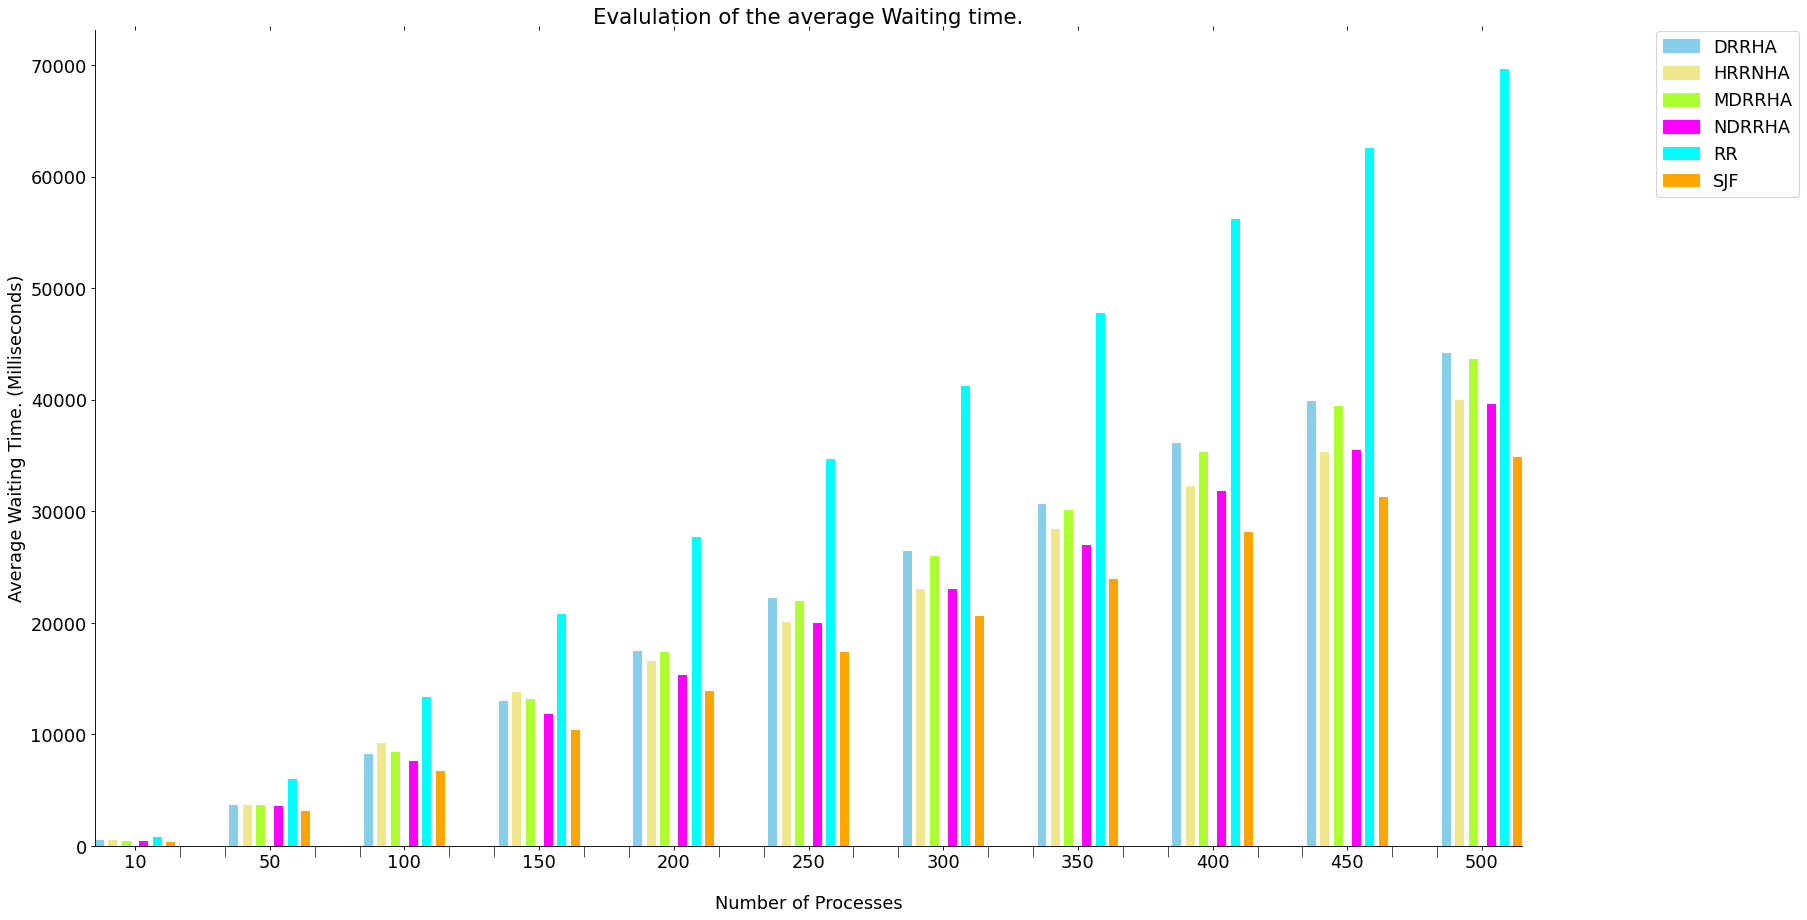

In [43]:
# Comparison of Algos Average Waiting Time and Number of Tasks

# Graph Configurations 
plt.figure(ALGO_COMPARISONS_WT_BAR)
fig = plt.figure(figsize = (12, 12), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['#cases'].unique()
X_labels = []
X_axis = []
X_axis_lines = [0]

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    counter += 1

    X_axis_lines.append(counter)
    counter += 1
    
    X_axis_lines.append(counter)
    counter += 1

X_labels = X_labels.astype(int)

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# Adding Lines to xTicks
line_width = 0.025
line_height = 10

ax.tick_params(axis = 'x', which = 'minor', direction = 'out', length = line_height)
ax.tick_params(axis = 'x', which = 'major', bottom = 'off', top = 'off')


bar_width = 0.20
paddings = [
    -0.8,
    -0.5,
    -0.2,
     0.2,
     0.5,
     0.8
]

colors = [
    'skyblue', 'DRRHA',
    'khaki', 'HRRNHA',
    'greenyellow', 'MDRRHA',
    'fuchsia', 'NDRRHA',
    'aqua', 'RR',
    'orange', 'SJF',
]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Plotting Bars
current_value_index = 0
num_algos = len(dataset['name'].unique())

# plot_metric = 'avgRT'
plot_metric = 'avgWT'
# plot_metric = 'avgTAT'

average_WT_values = dataset[plot_metric].to_numpy()     # To Plot Average Waiting Times
# average_WT_values = dataset['avgWT'].to_numpy()     # To Plot Average Waiting Times
# average_WT_values = dataset['avgTAT'].to_numpy()       # To Plot Average Turn around times


for index, x_axis in enumerate(X_axis):
    for i in range(0, num_algos):
        ax.bar(
            x_axis + paddings[i], 
            average_WT_values[current_value_index], 
            bar_width, 
            color = colors[2 * i]
        )

        current_value_index += 1

# Configuring Legend
legend_elements = []

for i in range(0, len(colors), 2):
    legend_elements.append(
        Patch(facecolor=colors[i], edgecolor=colors[i], label=colors[i + 1])
    )

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.20, 1.01)
)

plt.xlabel('Number of Processes', labelpad = 20)

# plt.ylabel(plot_metric)
plt.ylabel('Average Waiting Time. (Milliseconds)')
# plt.ylabel('Average Response Time. (Milliseconds)')
# plt.ylabel('Average Turnaround Time. (Milliseconds)')

plt.title('Evalulation of the average Waiting time.')
# plt.title('Evalulation of the average Response time.')
# plt.title('Evaluation of the average Turnaround time.')

N = len(X_axis) * 4
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.6 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

plt.show()


In [40]:
# Import Data from CSV file
dataset = pd.read_csv(
    output_filename, 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

# dataset = dataset.loc[dataset['name'].isin(['SJF', 'DRRHA'])]

sjf_values = dataset.loc[dataset['name'] == 'SJF']
drrha_values = dataset.loc[dataset['name'] == 'DRRHA']
mdrrha_values = dataset.loc[dataset['name'] == 'MDRRHA']
ndrrha_values = dataset.loc[dataset['name'] == 'NDRRHA']
hrrnha_values = dataset.loc[dataset['name'] == 'HRRNHA']

dataset = dataset.sort_values(by = ['#cases', 'name'])

# print(sjf_values)
# print(drrha_values)
# print(mdrrha_values)
# print(ndrrha_values)
# print(hrrnha_values)

<Figure size 432x288 with 0 Axes>

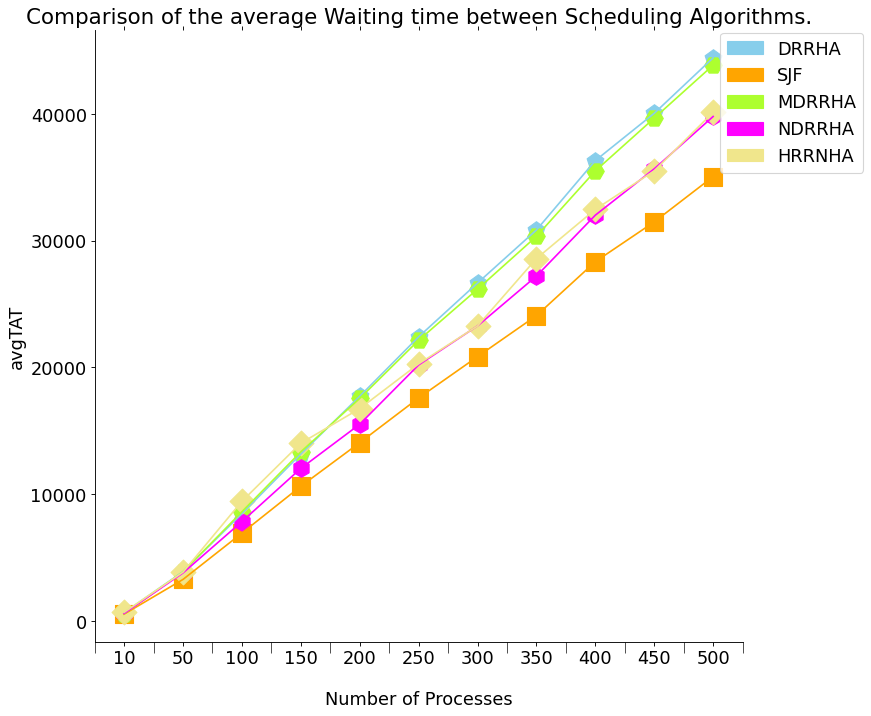

In [41]:
# Line Graph Comparison of DRRHA and STF Average Waiting Time and Number of Tasks

# Graph Configurations 
plt.figure(ALGO_COMPARISONS_WT_LINE)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['#cases'].unique()
X_labels = []
X_axis = []
X_axis_lines = [0]

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    counter += 1

    X_axis_lines.append(counter)
    counter += 1

X_labels = X_labels.astype(int)

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# Adding Lines to xTicks
line_width = 0.025
line_height = 10

ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

colors = [
    'skyblue', 'DRRHA',
    'orange', 'SJF',
    'greenyellow', 'MDRRHA',
    'fuchsia', 'NDRRHA',
    'khaki', 'HRRNHA'
]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Plotting Bars
marker_size = 250

# plot_metric = 'avgWT'
plot_metric = 'avgTAT'
# plot_metric = 'avgRT'

ax.plot(X_axis, sjf_values[plot_metric].to_numpy(), color = colors[2])
plt.scatter(X_axis, sjf_values[plot_metric].to_numpy(), marker = 's', s = marker_size, color = colors[2])

ax.plot(X_axis, drrha_values[plot_metric].to_numpy(), color = colors[0])
plt.scatter(X_axis, drrha_values[plot_metric].to_numpy(), marker = 'p', s = marker_size, color = colors[0])

ax.plot(X_axis, mdrrha_values[plot_metric].to_numpy(), color = colors[4])
plt.scatter(X_axis, mdrrha_values[plot_metric].to_numpy(), marker = 'H', s = marker_size, color = colors[4])

ax.plot(X_axis, ndrrha_values[plot_metric].to_numpy(), color = colors[6])
plt.scatter(X_axis, ndrrha_values[plot_metric].to_numpy(), marker = 'h', s = marker_size, color = colors[6])

ax.plot(X_axis, hrrnha_values[plot_metric].to_numpy(), color = colors[8])
plt.scatter(X_axis, hrrnha_values[plot_metric].to_numpy(), marker = 'D', s = marker_size, color = colors[8])

# Configuring Legend
legend_elements = []

for i in range(0, len(colors), 2):
    legend_elements.append(
        Patch(facecolor=colors[i], edgecolor=colors[i], label=colors[i + 1])
    )

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.20, 1.01)
)

plt.xlabel('Number of Processes', labelpad = 20)
plt.ylabel(plot_metric)
# plt.ylabel('Average Waiting Time. (Milliseconds)')
# plt.ylabel('Average Turnaround Time. (Milliseconds)')
# plt.ylabel('Average Response Time. (Milliseconds)')
# plt.ylabel(plot_metric)
plt.title('Comparison of the average Waiting time between Scheduling Algorithms.')
plt.show()